In [7]:
import subprocess
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

In [8]:
!g++ barabasi_albert_vs_0_1_pairings.cpp -O3 -o barabasi_albert_vs_0_1_pairings

In [9]:
def run_experiment(n: int, m: int, reps: int) -> tuple[dict, dict]:
    result = subprocess.run(["./barabasi_albert_vs_0_1_pairings", str(n), str(m), str(reps)], capture_output=True, text=True)

    def read_data(filename: str) -> dict:
        with open(filename, "r") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]

        n_m_line = lines[0]
        loop_mult_line = lines[1]
        degree_lines = lines[2:]

        n, m = map(int, n_m_line.split())
        loops, multiedges = map(float, loop_mult_line.split())

        degrees = {}
        for line in degree_lines:
            deg, cnt = map(float, line.split())
            degrees[deg] = cnt

        return {
            "n": n, "m": m,
            "loops": loops, "multiedges": multiedges,
            "degrees": degrees
        }


    filename1 = f"result_pairing_01_{m}_{n}_{reps}.txt"
    filename2 = f"result_batagelj_urlika_brandes_{m}_{n}_{reps}.txt"

    ret =  read_data(filename1), read_data(filename2)

    os.remove(filename1)
    os.remove(filename2)

    return ret

### Loops & Multiedges

In [10]:
N_VALUES = list(range(50, 1001, 50))
M_VALUES = [1, 3, 5]
REPS = 1000
RECALCULATE = False

data1 = {}

if RECALCULATE:
    for m in M_VALUES:
        data1[m] = {}
        for n in N_VALUES:
            data1[m][n] = {}
            rp, rb = run_experiment(n, m, REPS)

            data1[m][n]["rp"] = {"loops": rp["loops"], "multiedges": rp["multiedges"]}
            data1[m][n]["rb"] = {"loops": rb["loops"], "multiedges": rb["multiedges"]}
else:
    with open("data1.pkl", "rb") as f:
        data1 = pickle.load(f)

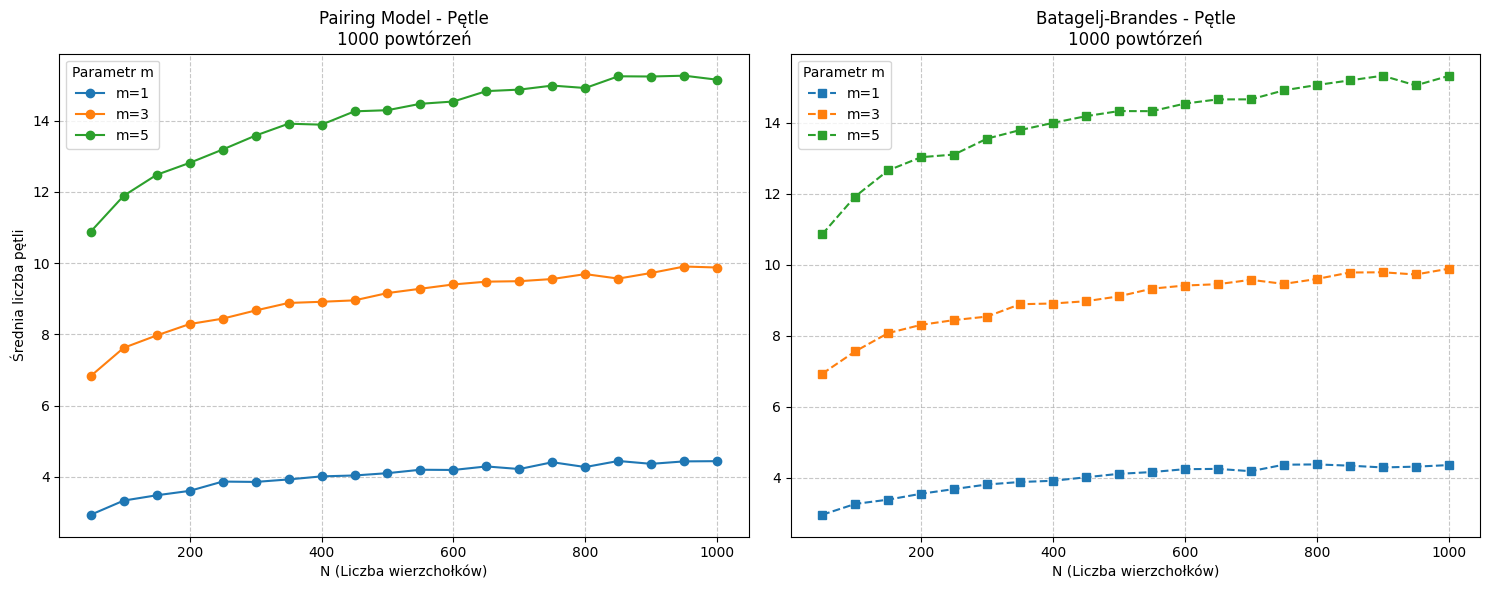

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for m in M_VALUES:
    y_values = [data1[m][n]["rp"]["loops"] for n in N_VALUES]
    axes[0].plot(N_VALUES, y_values, marker='o', label=f'm={m}')

axes[0].set_title(f"Pairing Model - Pętle\n{REPS} powtórzeń")
axes[0].set_xlabel("N (Liczba wierzchołków)")
axes[0].set_ylabel("Średnia liczba pętli")
axes[0].legend(title="Parametr m")
axes[0].grid(True, linestyle='--', alpha=0.7)

for m in M_VALUES:
    y_values = [data1[m][n]["rb"]["loops"] for n in N_VALUES]
    
    axes[1].plot(N_VALUES, y_values, marker='s', linestyle='--', label=f'm={m}')

axes[1].set_title(f"Batagelj-Brandes - Pętle\n{REPS} powtórzeń")
axes[1].set_xlabel("N (Liczba wierzchołków)")
axes[1].legend(title="Parametr m")
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

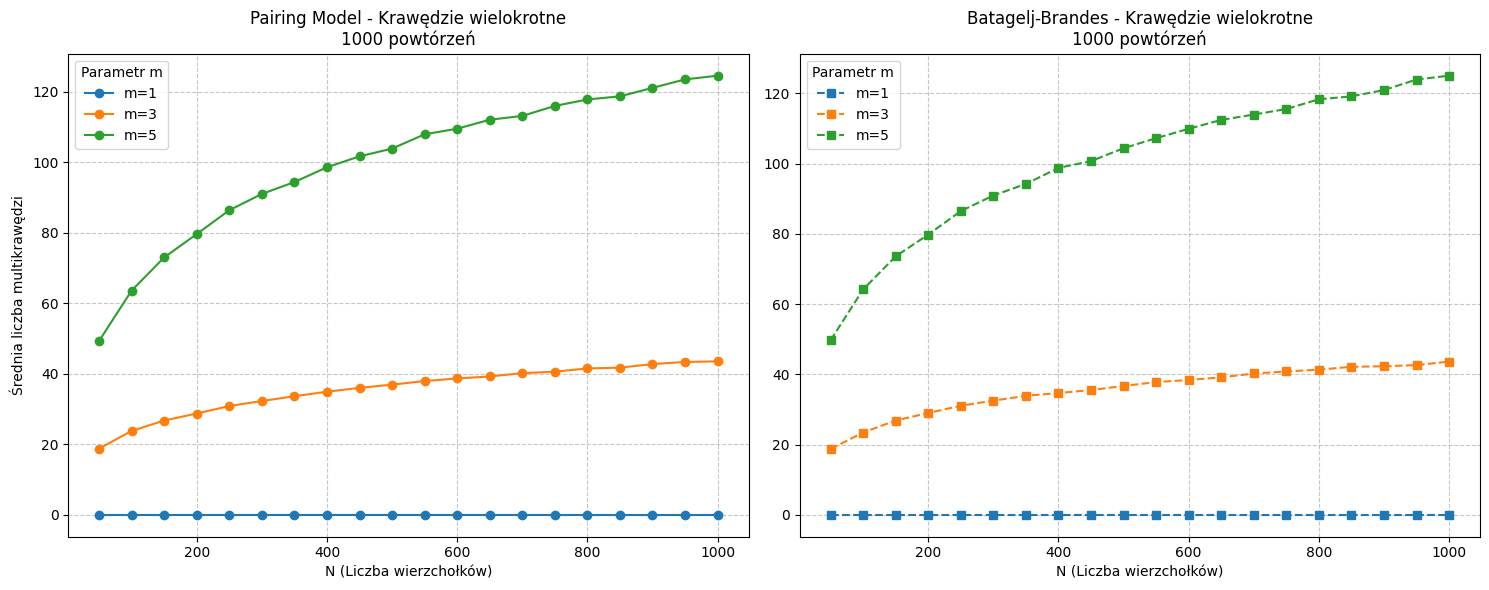

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for m in M_VALUES:
    y_values = [data1[m][n]["rp"]["multiedges"] for n in N_VALUES]
    axes[0].plot(N_VALUES, y_values, marker='o', label=f'm={m}')

axes[0].set_title(f"Pairing Model - Krawędzie wielokrotne\n{REPS} powtórzeń")
axes[0].set_xlabel("N (Liczba wierzchołków)")
axes[0].set_ylabel("Średnia liczba multikrawędzi")
axes[0].legend(title="Parametr m")
axes[0].grid(True, linestyle='--', alpha=0.7)

for m in M_VALUES:
    y_values = [data1[m][n]["rb"]["multiedges"] for n in N_VALUES]
    
    axes[1].plot(N_VALUES, y_values, marker='s', linestyle='--', label=f'm={m}')

axes[1].set_title(f"Batagelj-Brandes - Krawędzie wielokrotne\n{REPS} powtórzeń")
axes[1].set_xlabel("N (Liczba wierzchołków)")
axes[1].legend(title="Parametr m")
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Degree distribution

In [21]:
N_VALUES = [50, 100, 500, 1000, 5000, 10000, 100000]
M_VALUES = [1, 3, 5]
REPS = 1
RECALCULATE = True

In [22]:
data2 = {}

if RECALCULATE:
    for m in M_VALUES:
        data2[m] = {}
        for n in N_VALUES:
            data2[m][n] = {}
            rp, rb = run_experiment(n, m, REPS)

            data2[m][n]["rp"] = rp["degrees"]
            data2[m][n]["rb"] = rb["degrees"]
else:
    with open("data2.pkl", "rb") as f:
        data2 = pickle.load(f)

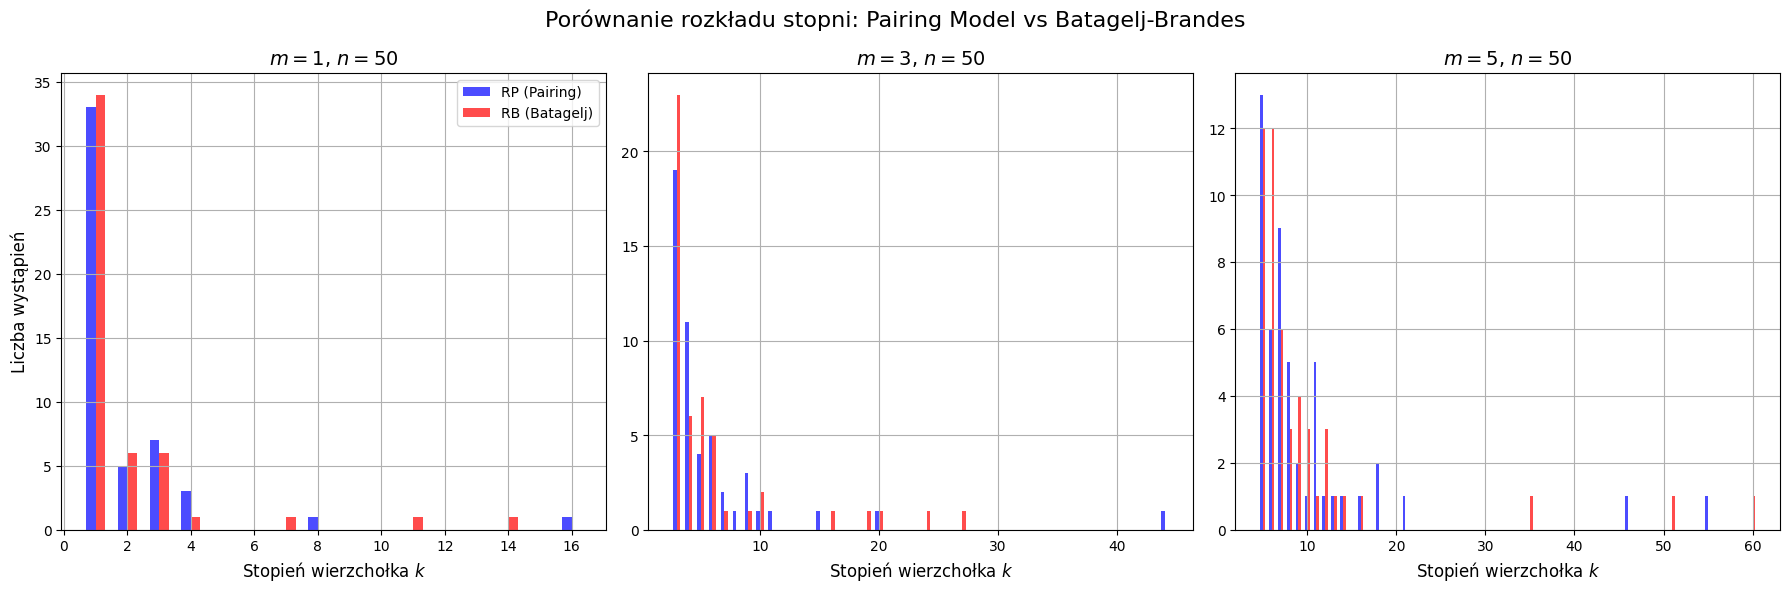

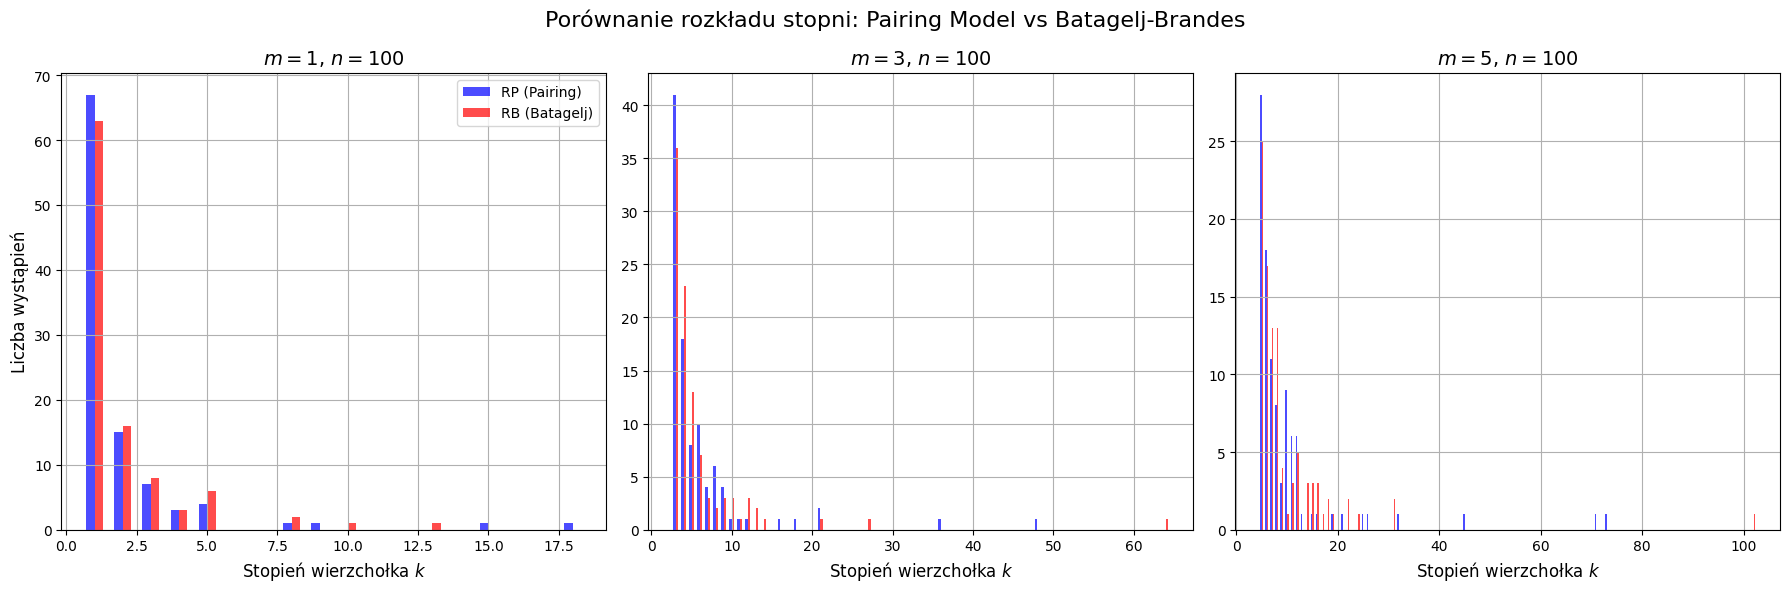

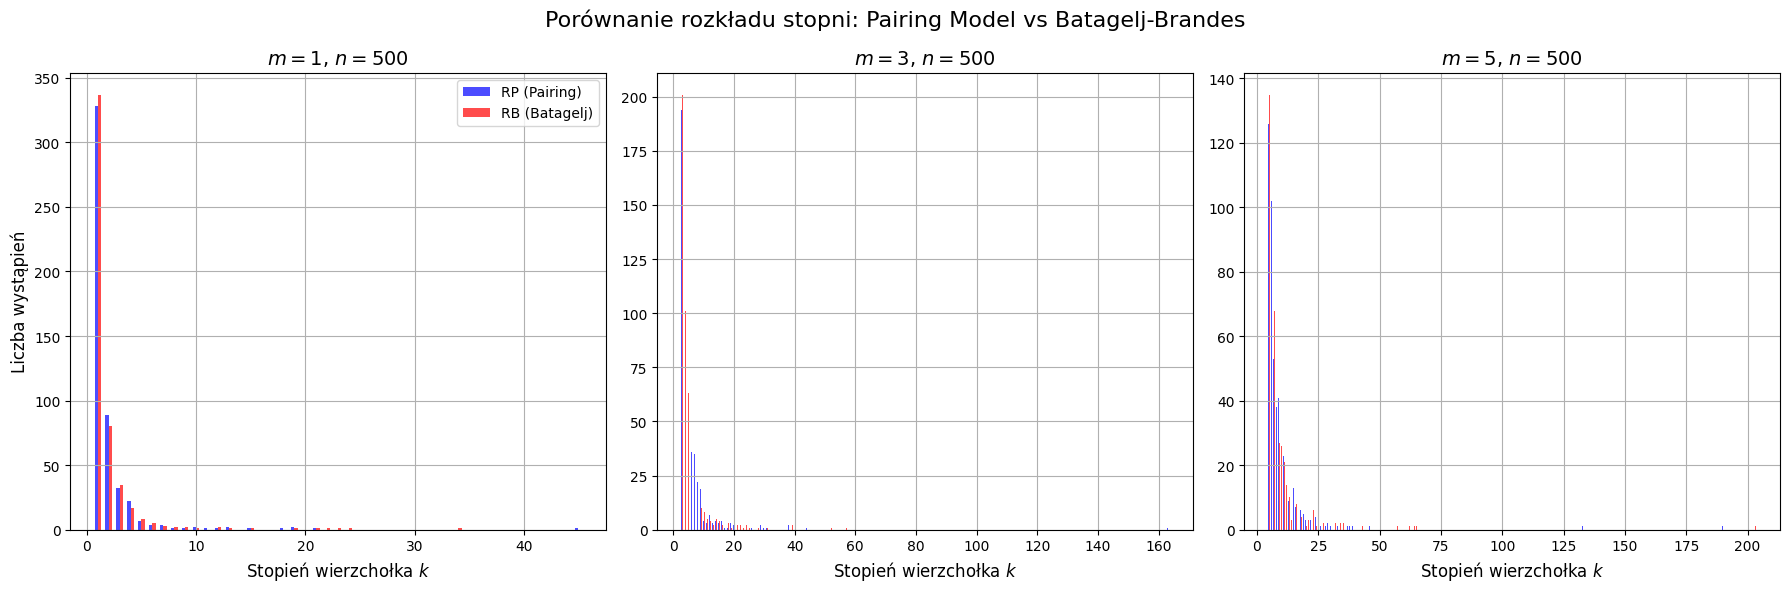

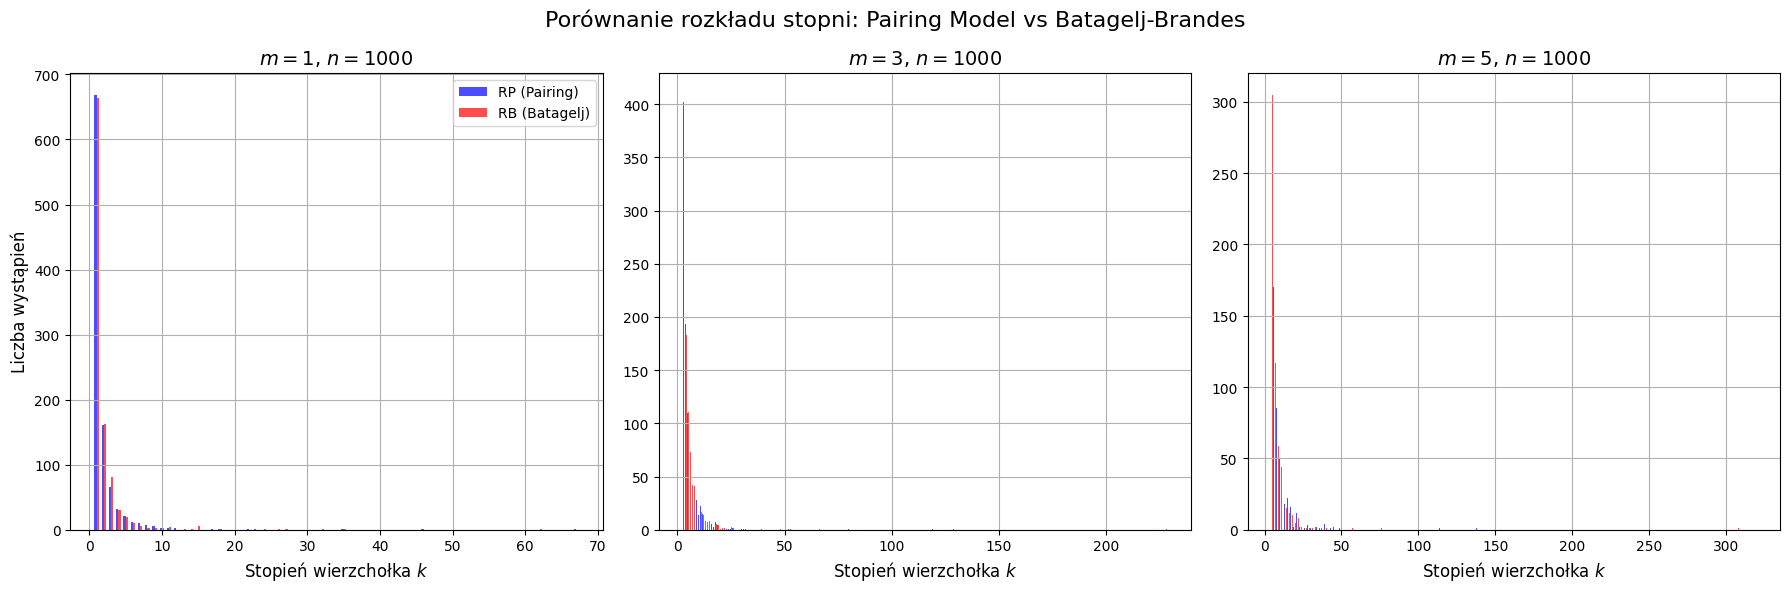

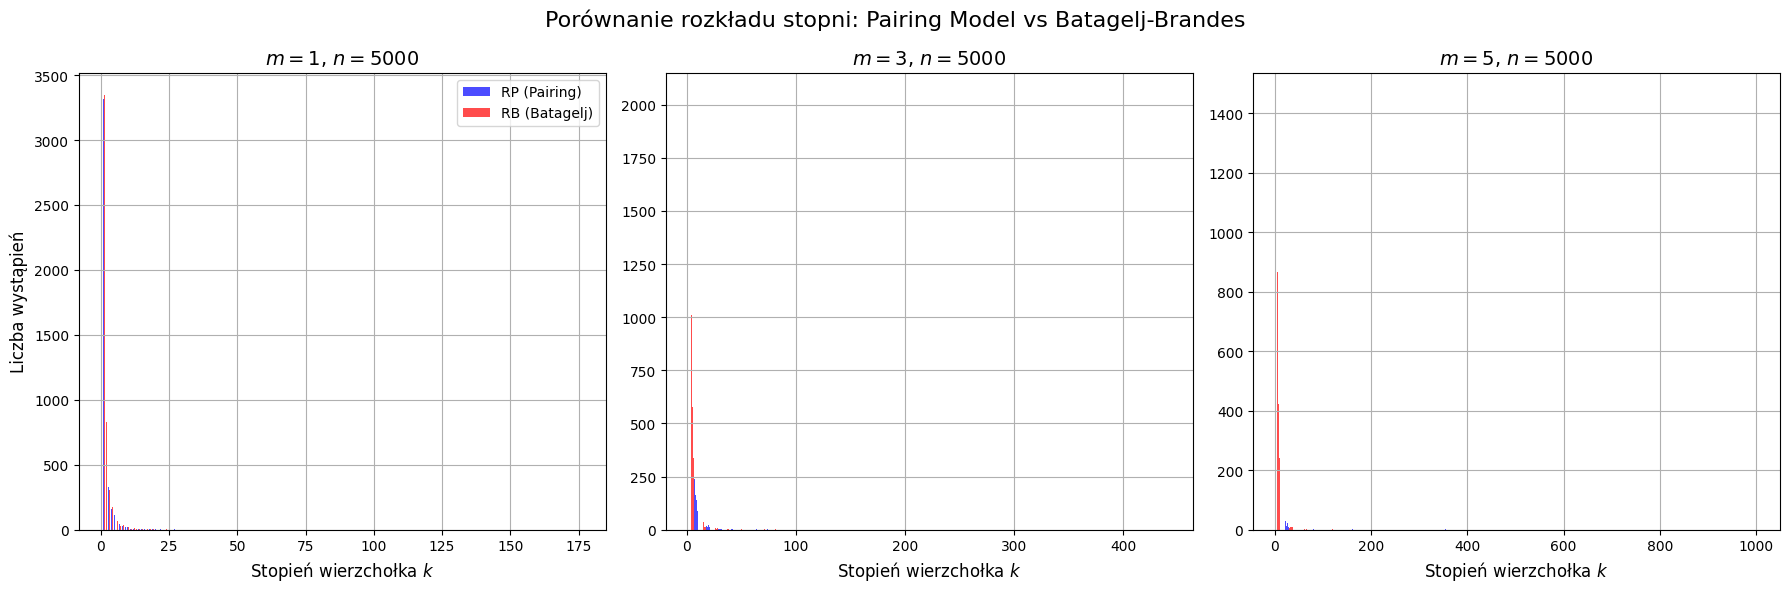

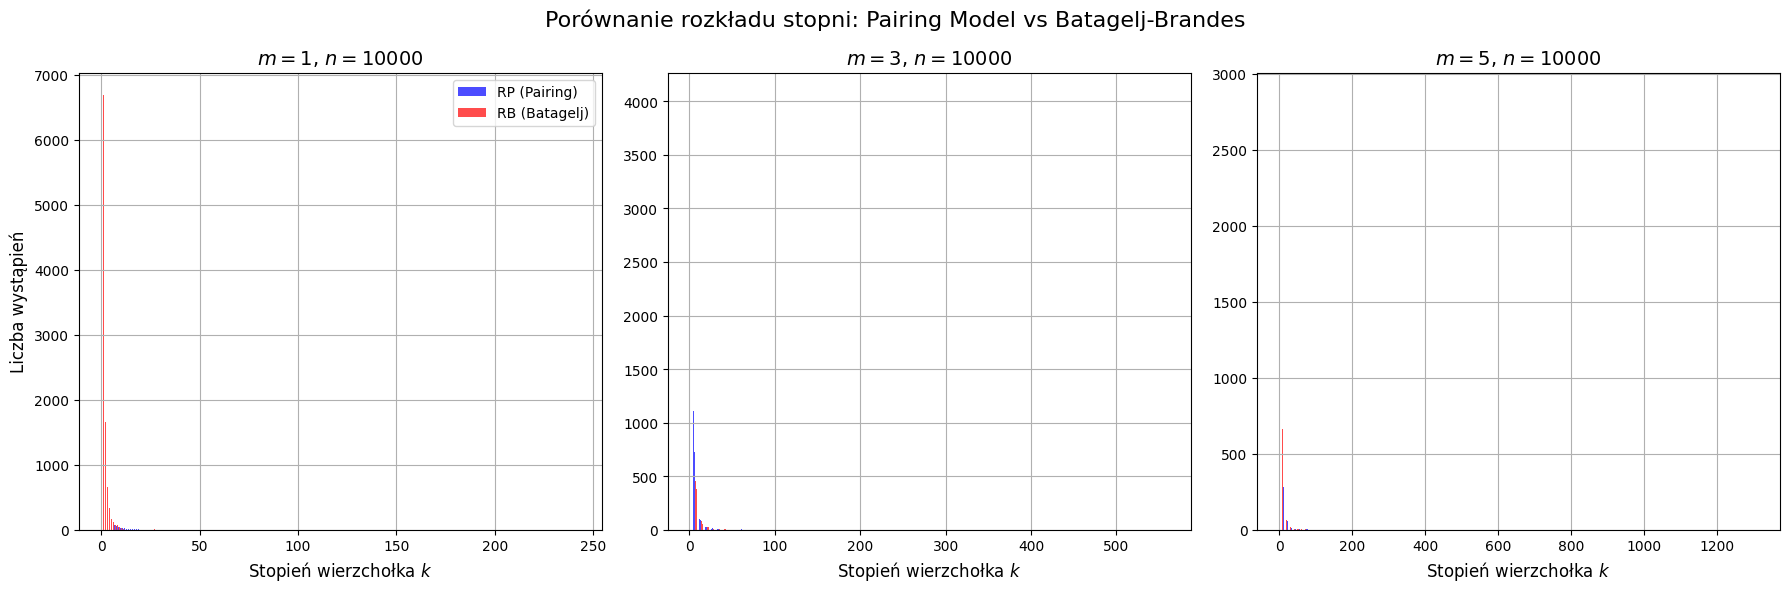

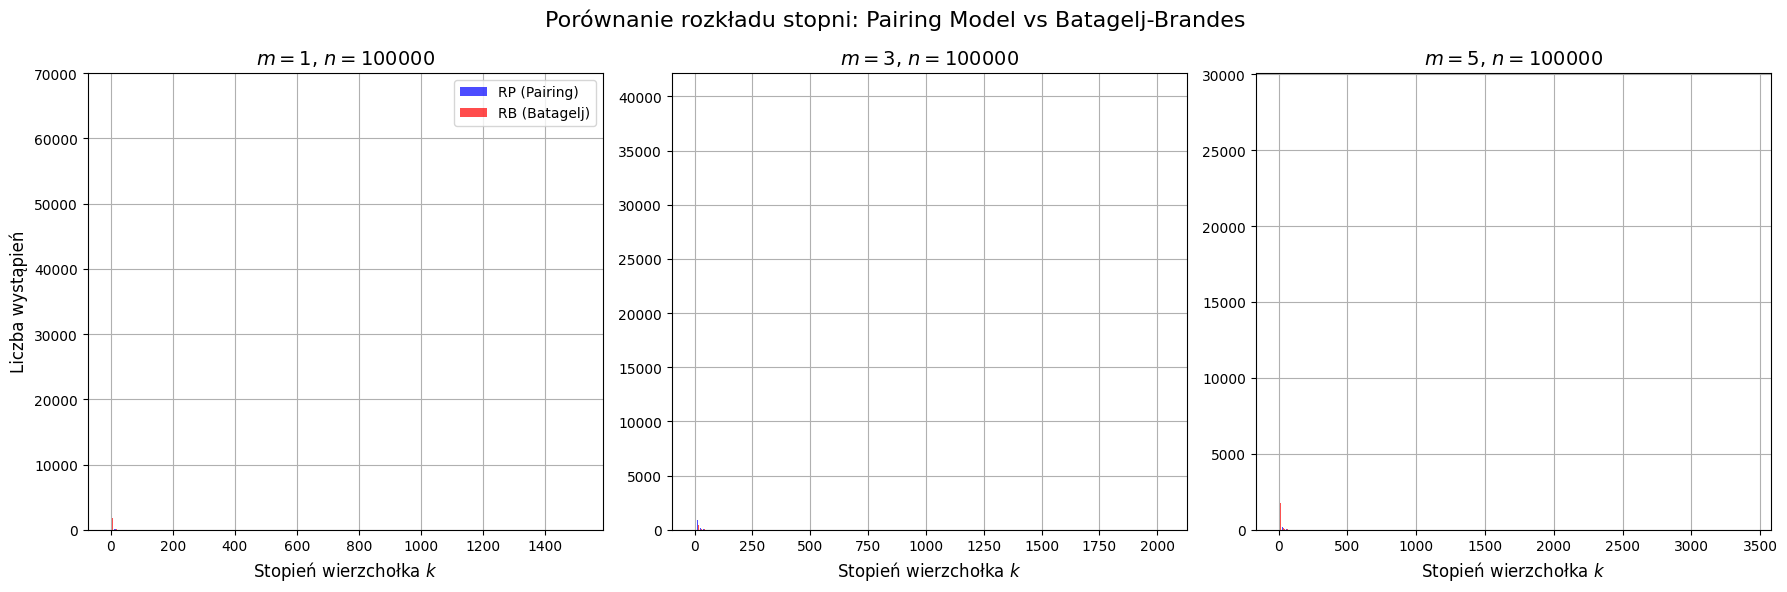

In [23]:
for n in N_VALUES:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    for ax, m in zip(axes, M_VALUES):
        data_rp = data2[m][n]["rp"]
        data_rb = data2[m][n]["rb"]
        
        degrees = sorted(list(set(data_rp.keys()) | set(data_rb.keys())))
        
        y_rp = [data_rp.get(k, 0) for k in degrees]
        y_rb = [data_rb.get(k, 0) for k in degrees]

        width_factor = 0.3
        widths = [width_factor for k in degrees]

        x_rp = [k - (w / 2) for k, w in zip(degrees, widths)]
        x_rb = [k + (w / 2) for k, w in zip(degrees, widths)]

        ax.bar(x_rp, y_rp, width=widths, color='blue', alpha=0.7, label='RP (Pairing)')
        ax.bar(x_rb, y_rb, width=widths, color='red', alpha=0.7, label='RB (Batagelj)')

        # ax.set_xscale('log')
        # ax.set_yscale('log')
        
        ax.set_title(f"$m={m}$, $n={n}$", fontsize=14)
        ax.set_xlabel("Stopień wierzchołka $k$", fontsize=12)
        ax.grid(True)

    axes[0].legend(loc='upper right')
    axes[0].set_ylabel("Liczba wystąpień", fontsize=12)

    fig.suptitle("Porównanie rozkładu stopni: Pairing Model vs Batagelj-Brandes", fontsize=16)

    plt.tight_layout()
    plt.show()

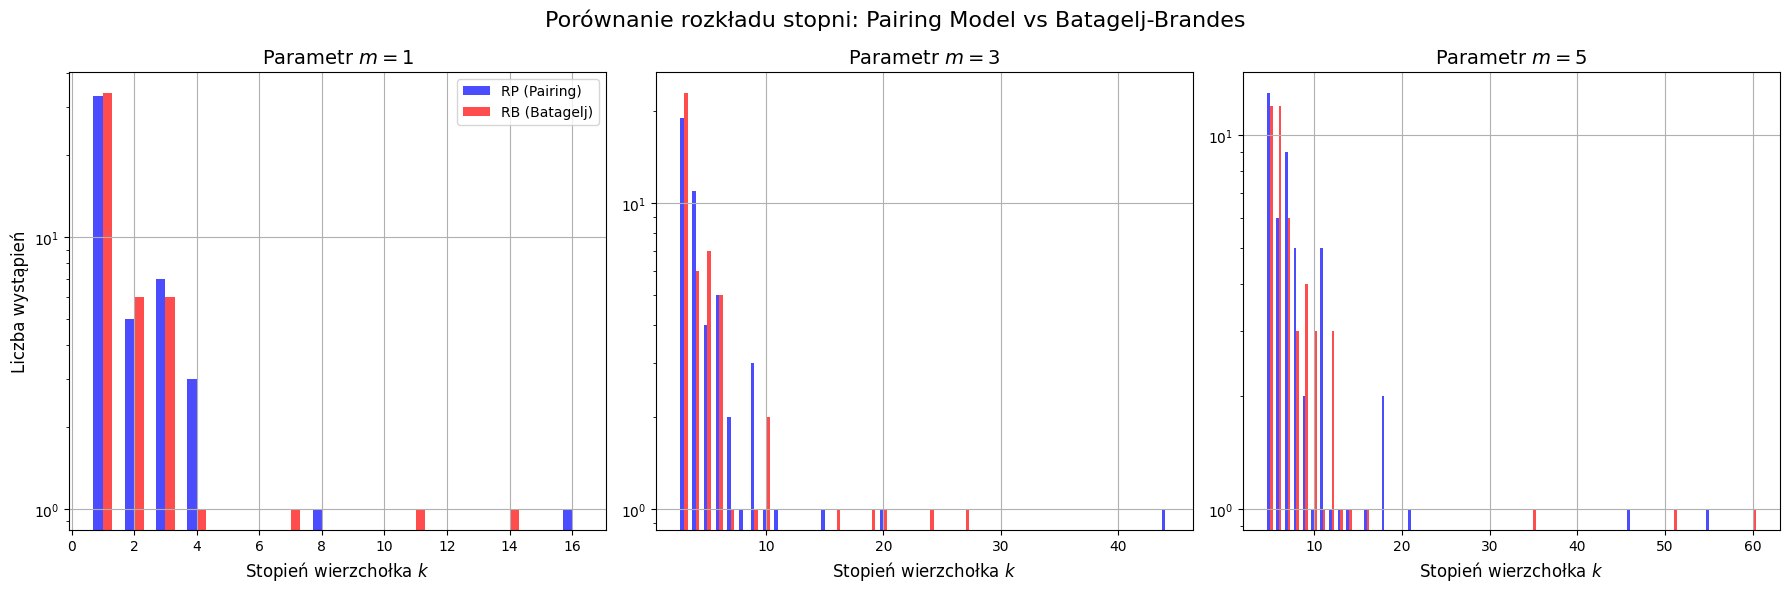

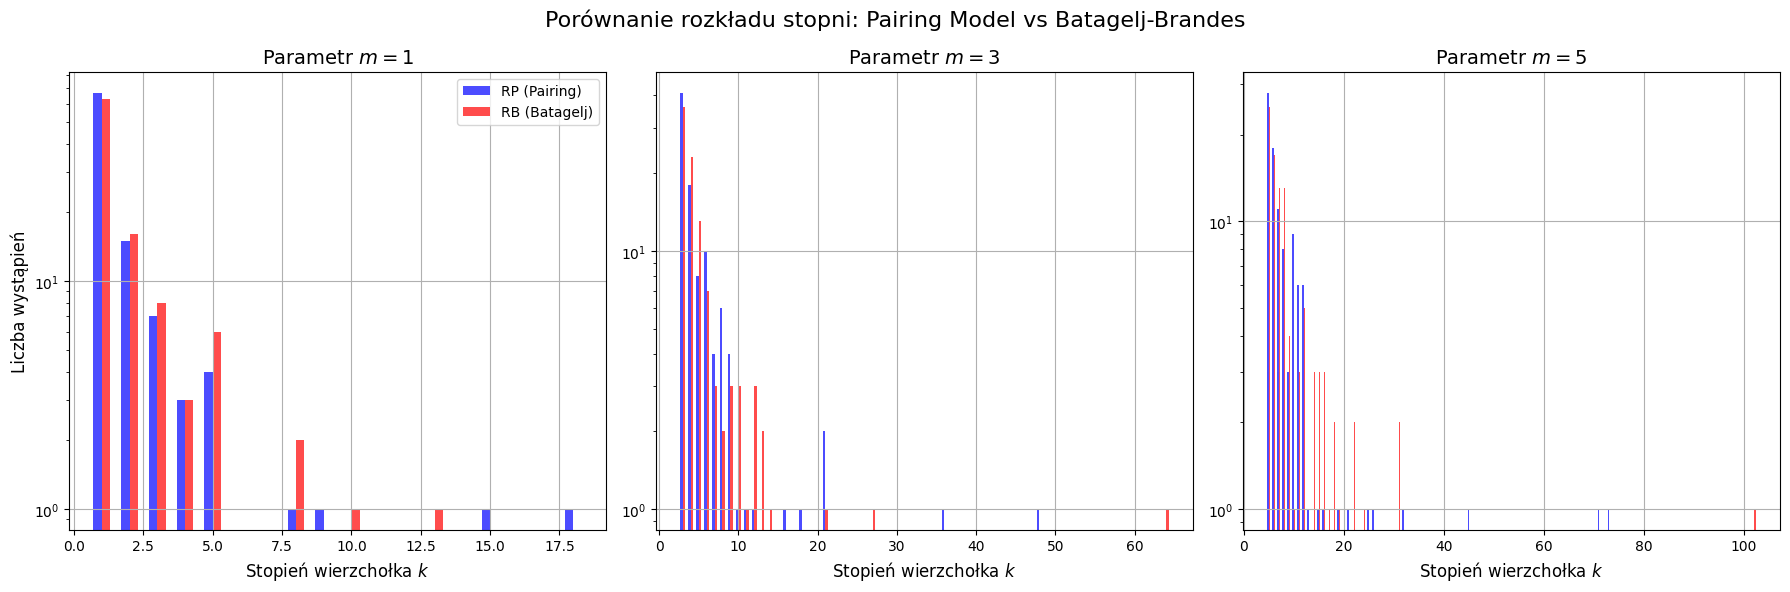

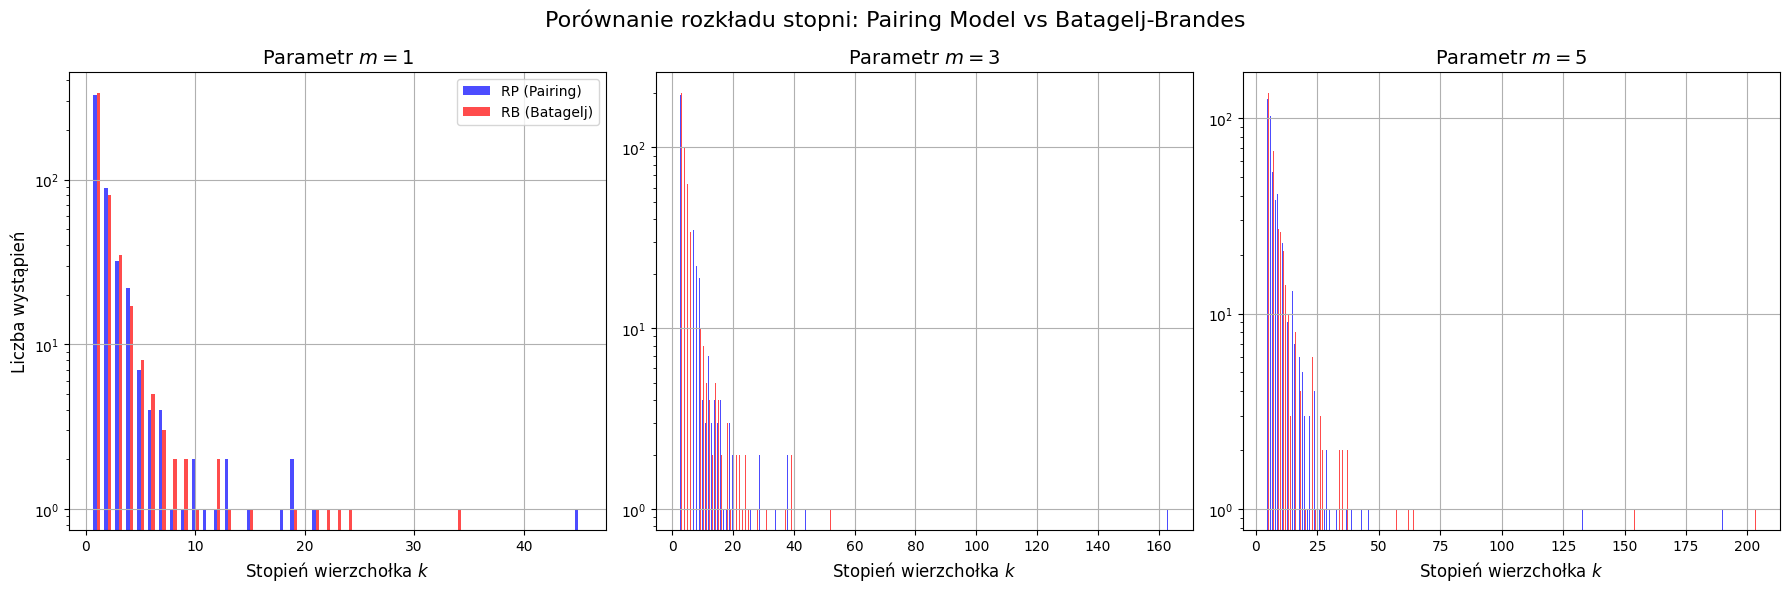

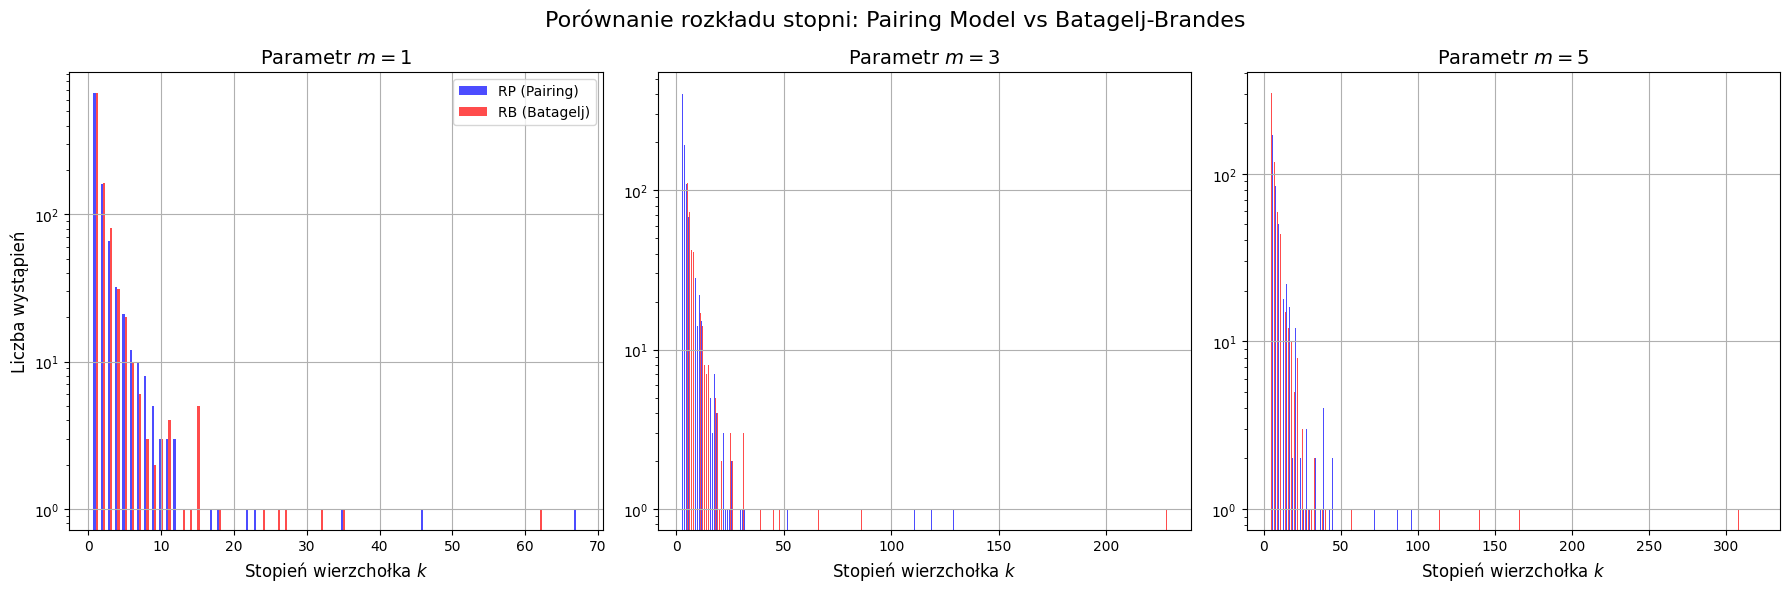

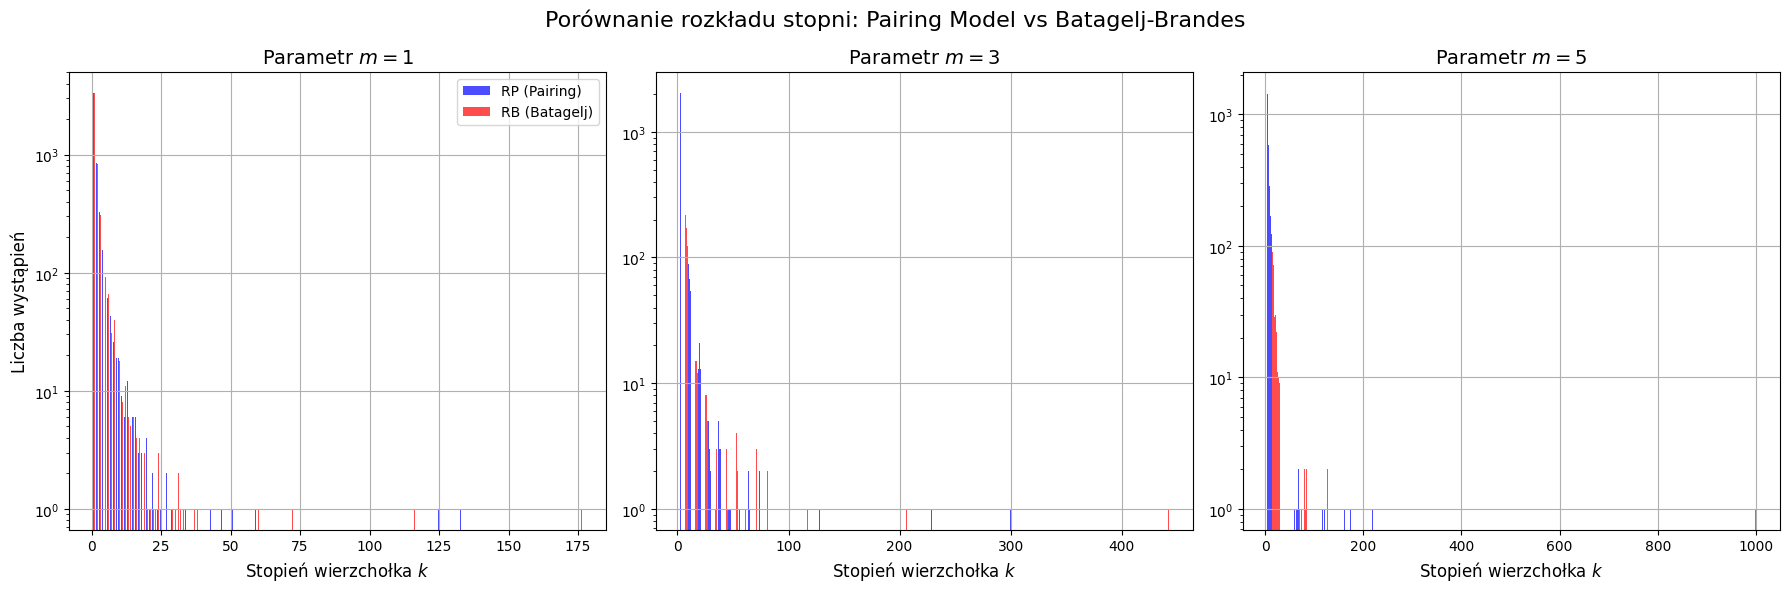

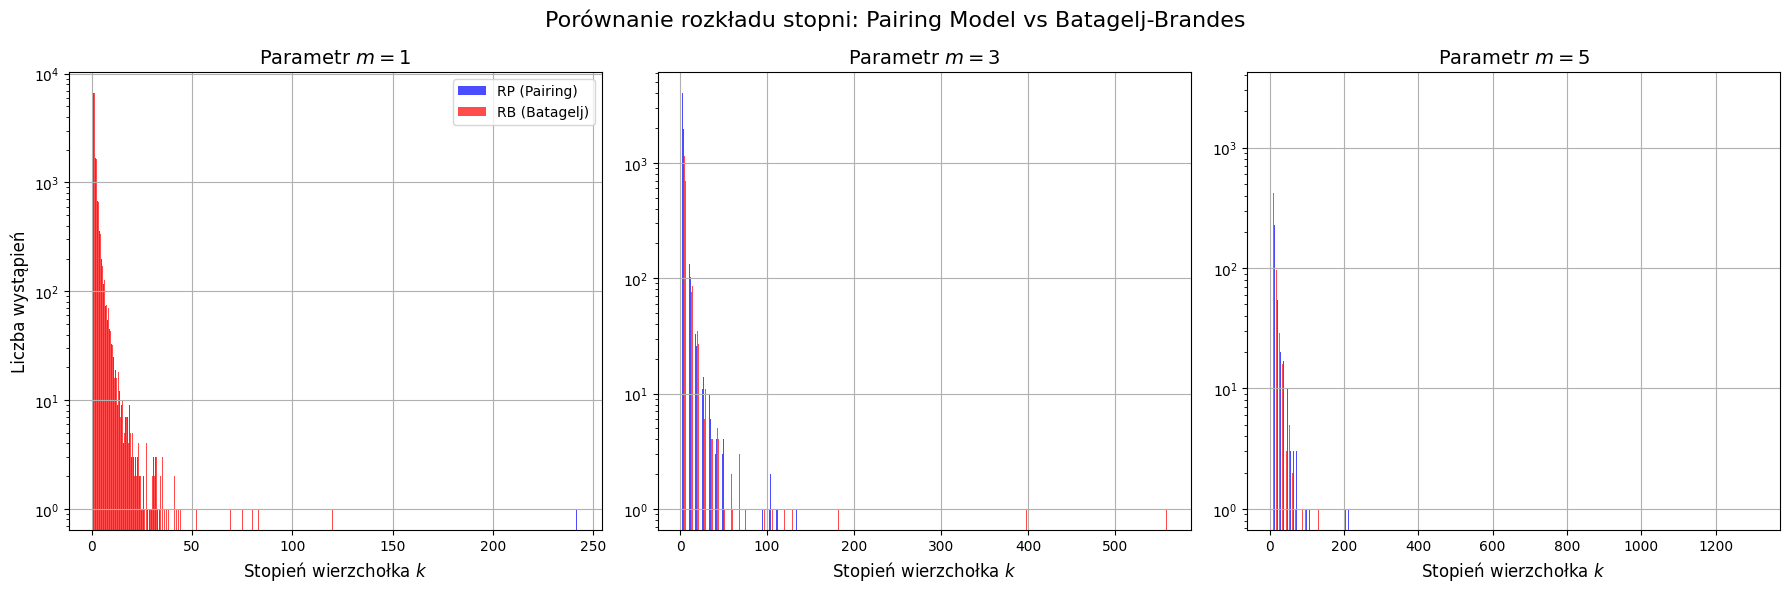

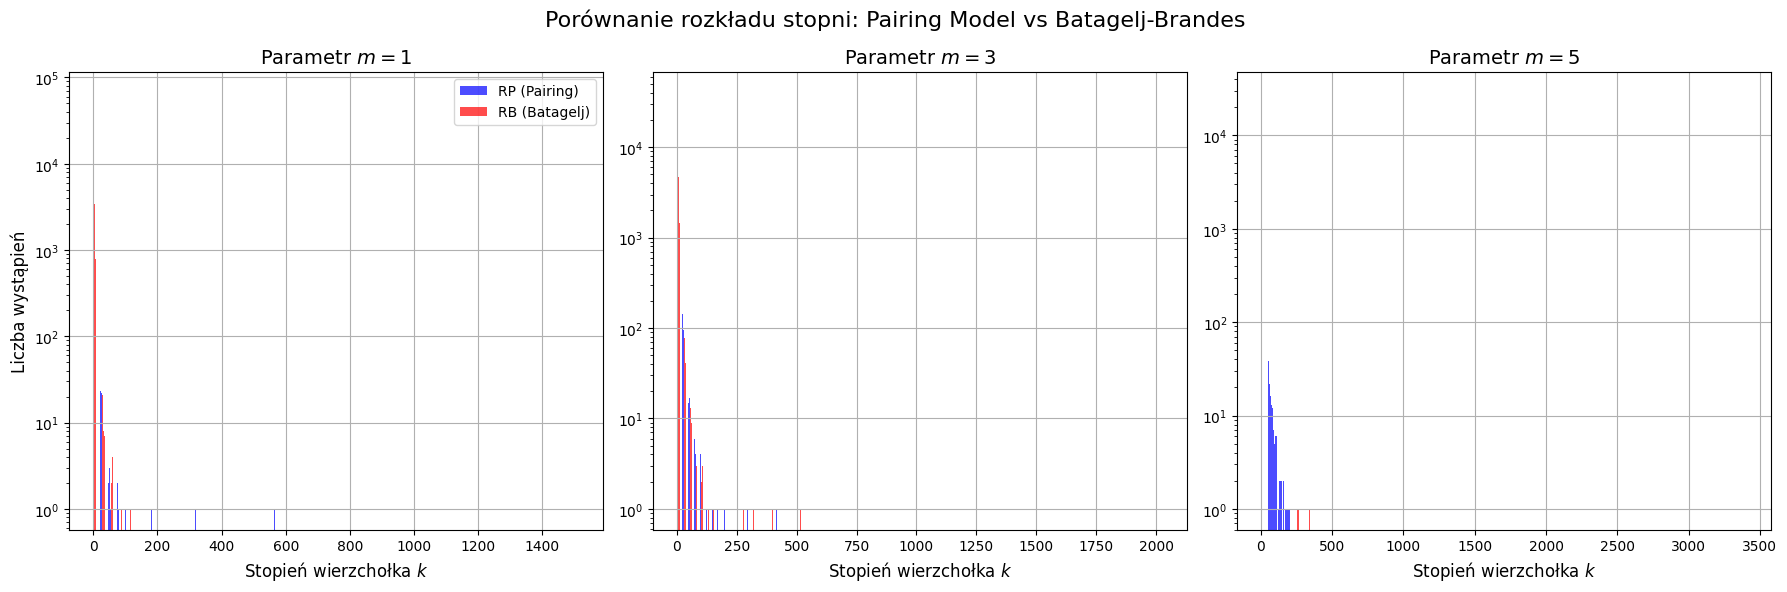

In [24]:
for n in N_VALUES:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    for ax, m in zip(axes, M_VALUES):
        data_rp = data2[m][n]["rp"]
        data_rb = data2[m][n]["rb"]
        
        degrees = sorted(list(set(data_rp.keys()) | set(data_rb.keys())))
        
        y_rp = [data_rp.get(k, 0) for k in degrees]
        y_rb = [data_rb.get(k, 0) for k in degrees]

        width_factor = 0.3
        widths = [width_factor for k in degrees]

        x_rp = [k - (w / 2) for k, w in zip(degrees, widths)]
        x_rb = [k + (w / 2) for k, w in zip(degrees, widths)]

        ax.bar(x_rp, y_rp, width=widths, color='blue', alpha=0.7, label='RP (Pairing)')
        ax.bar(x_rb, y_rb, width=widths, color='red', alpha=0.7, label='RB (Batagelj)')

        # ax.set_xscale('log')
        ax.set_yscale('log')
        
        ax.set_title(f"Parametr $m={m}$", fontsize=14)
        ax.set_xlabel("Stopień wierzchołka $k$", fontsize=12)
        ax.grid(True)

    axes[0].legend(loc='upper right')
    axes[0].set_ylabel("Liczba wystąpień", fontsize=12)

    fig.suptitle("Porównanie rozkładu stopni: Pairing Model vs Batagelj-Brandes", fontsize=16)

    plt.tight_layout()
    plt.show()

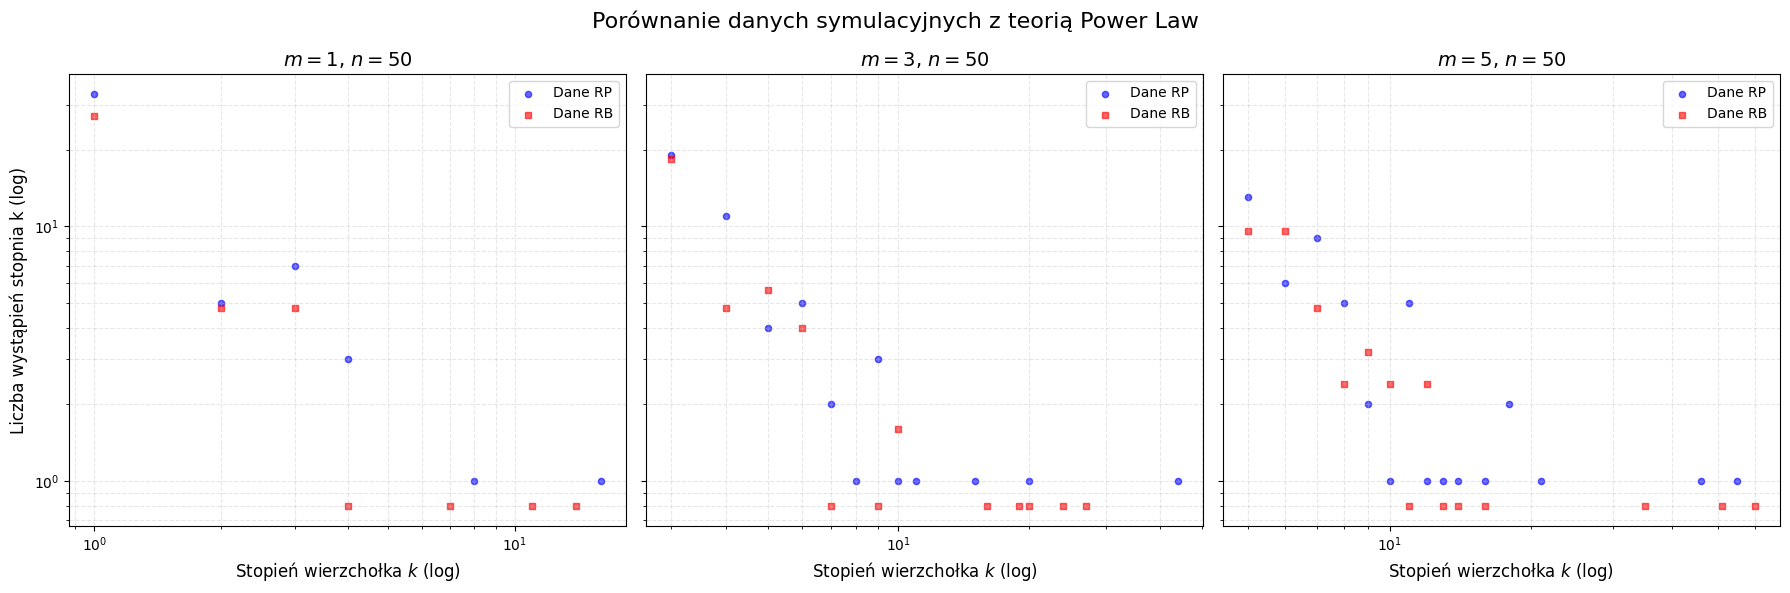

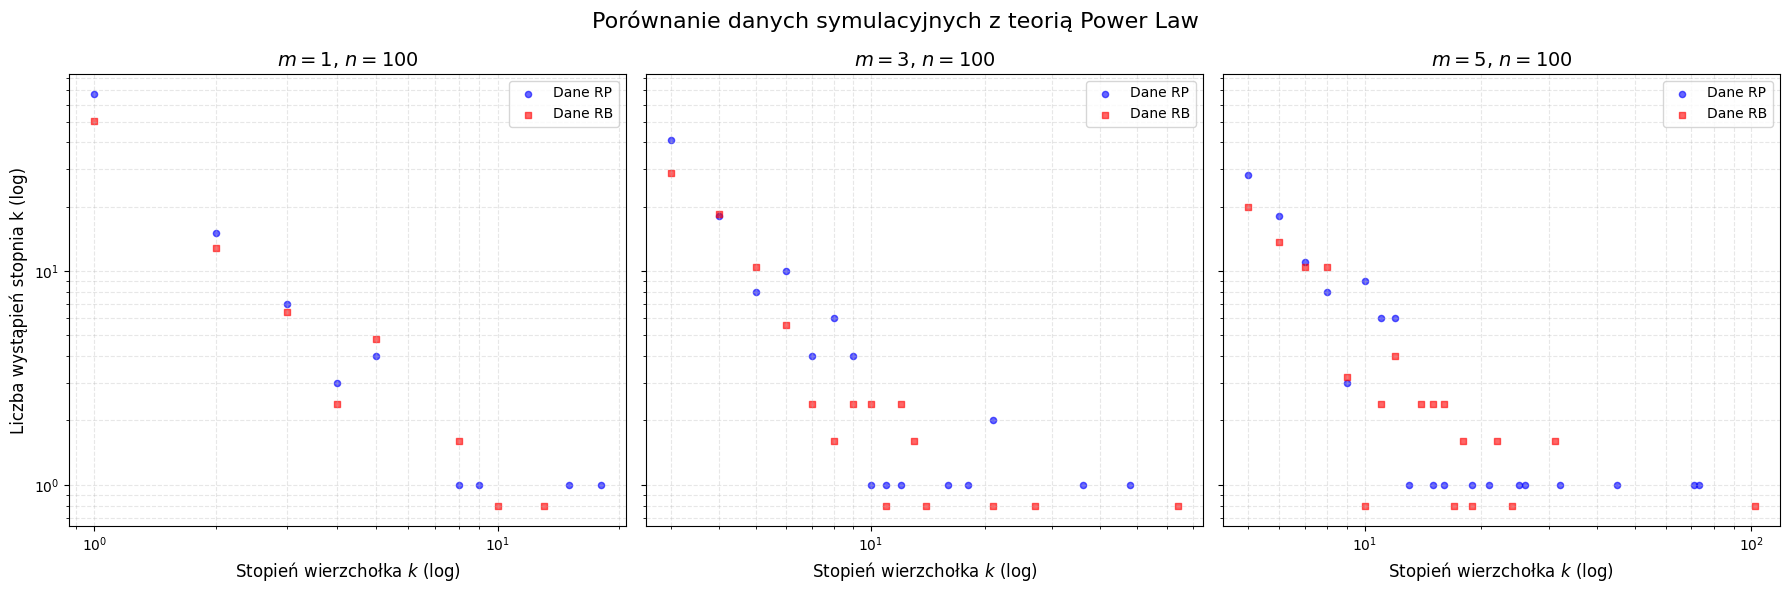

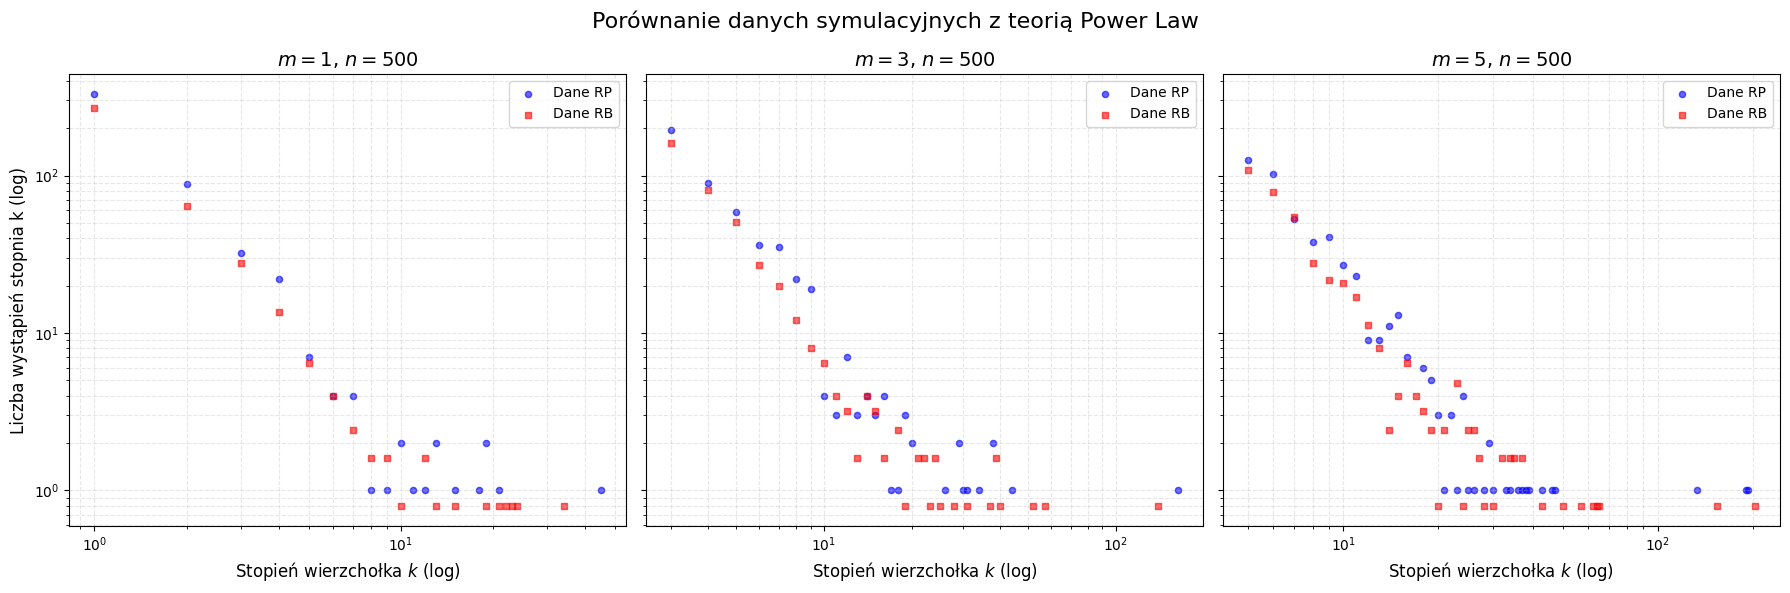

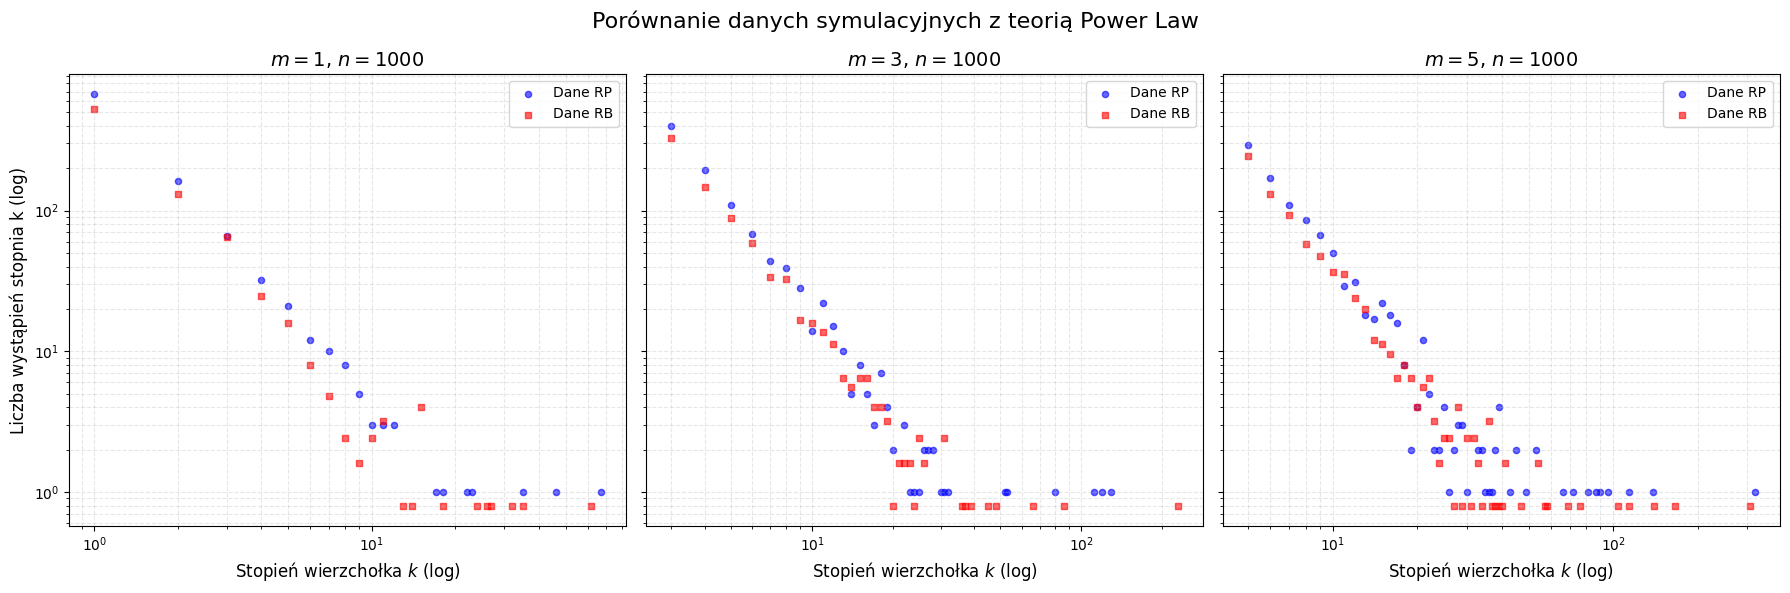

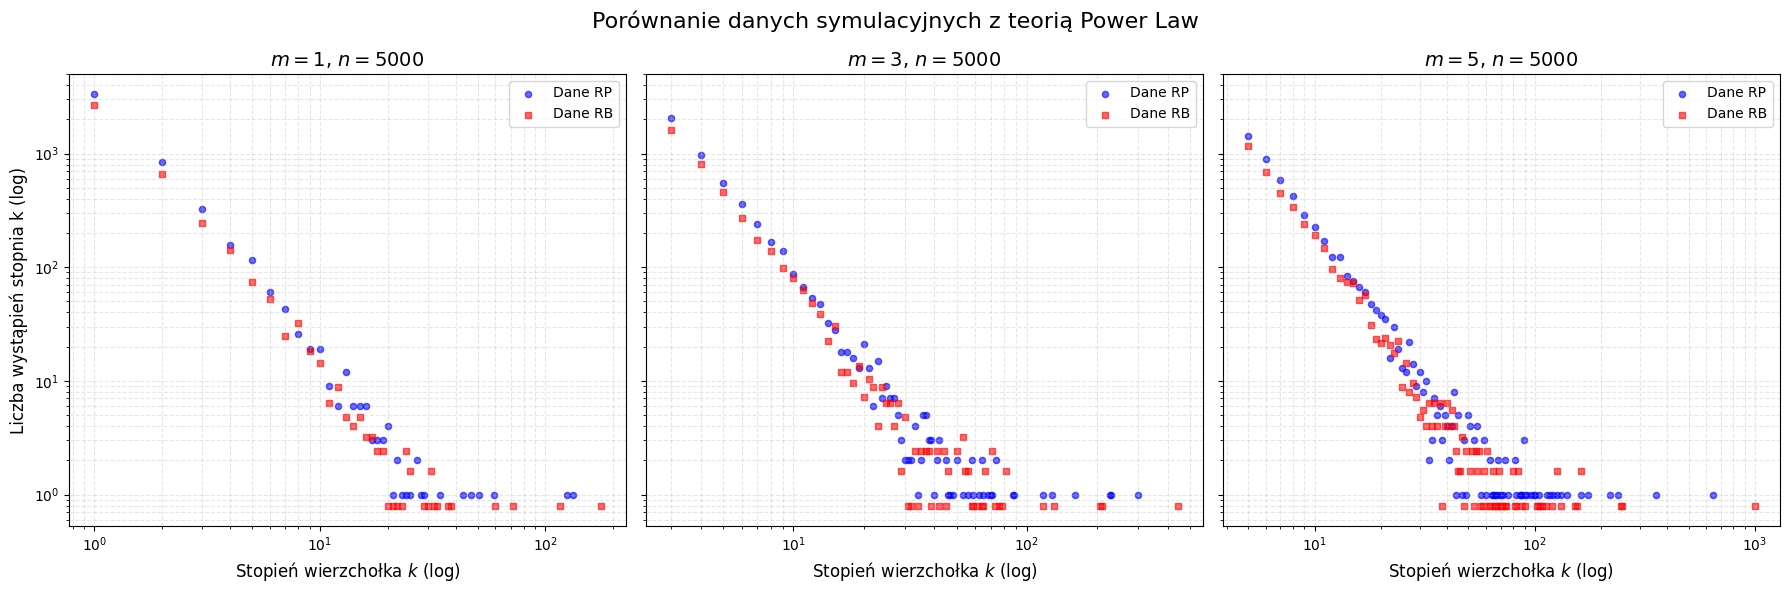

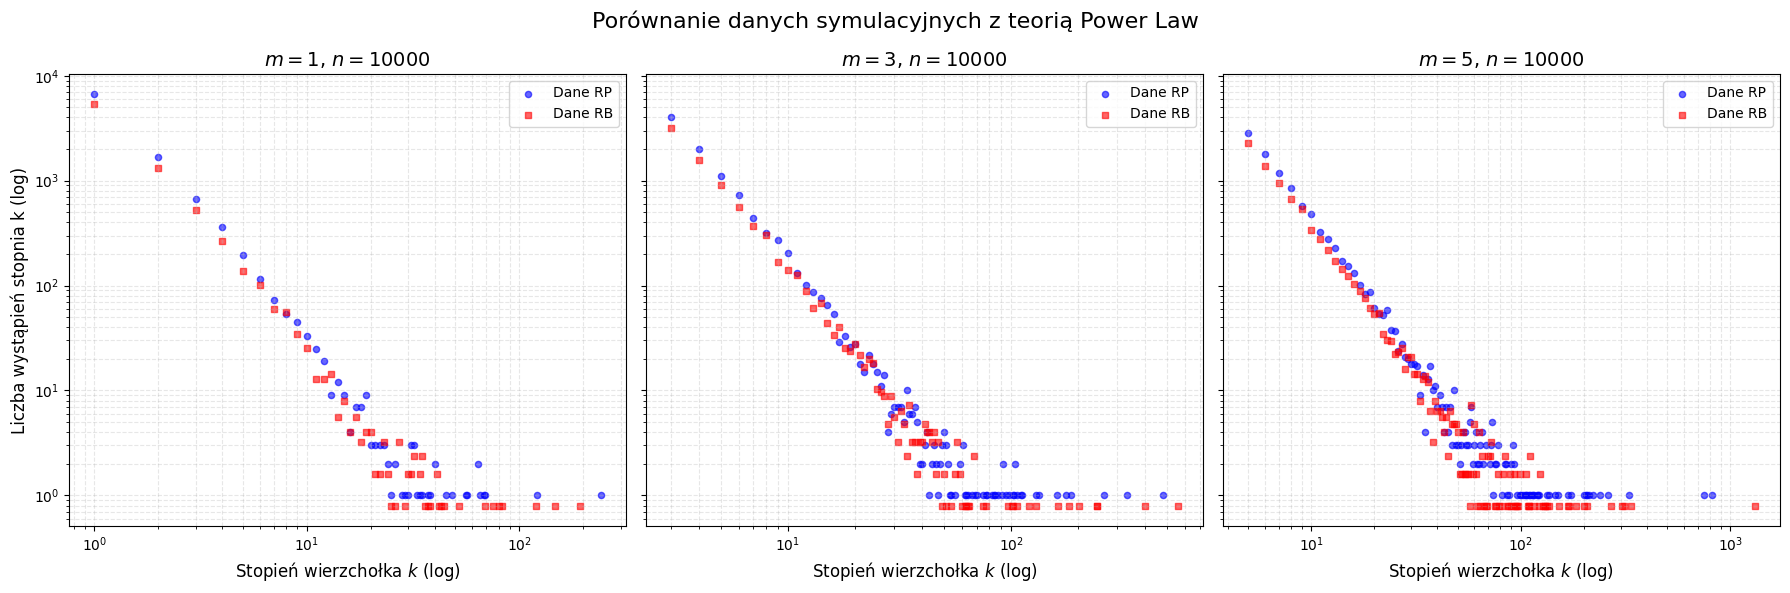

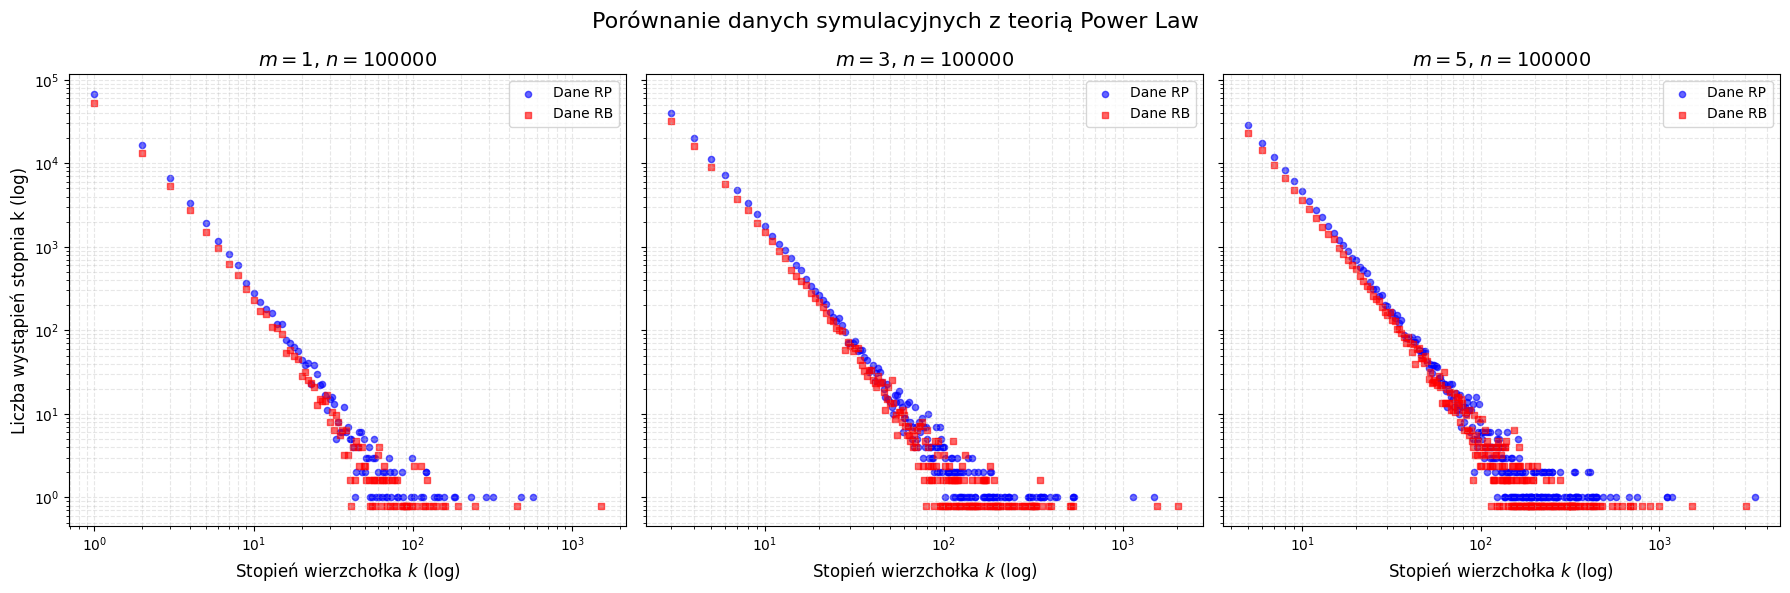

In [25]:
def get_fit_line(data_dict):
    x = np.array(sorted(list(data_dict.keys())))
    y = np.array([data_dict[k] for k in x])

    mask = y > 2.0
    
    if np.sum(mask) < 3:
        mask = y > 0

    x_fit = x[mask]
    y_fit = y[mask]

    if len(x_fit) < 2: return 0, x, y

    log_x = np.log(x_fit)
    log_y = np.log(y_fit)
    coeffs = np.polyfit(log_x, log_y, 1)
    
    gamma = -coeffs[0]
    intercept = coeffs[1]

    x_line = np.linspace(min(x), max(x), 100)
    y_line = np.exp(intercept) * (x_line ** coeffs[0])

    return gamma, x_line, y_line

for n in N_VALUES:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    for ax, m in zip(axes, M_VALUES):
        rp_dict = data2[m][n]["rp"]
        rb_dict = data2[m][n]["rb"]

        x_rp = sorted(list(rp_dict.keys()))
        y_rp = [rp_dict[k] for k in x_rp]
        
        x_rb = sorted(list(rb_dict.keys()))
        y_rb = [rb_dict[k] for k in x_rb]

        ax.scatter(x_rp, y_rp, s=20, color='blue', alpha=0.6, label='Dane RP', marker='o')
        ax.scatter(x_rb, [y*0.8 for y in y_rb], s=20, color='red', alpha=0.6, label='Dane RB', marker='s')

        # gamma_rp, lx_rp, ly_rp = get_fit_line(rp_dict)
        # ax.plot(lx_rp, ly_rp, color='darkblue', linestyle='--', linewidth=2, 
        #         label=f'RP Fit ($\gamma={gamma_rp:.2f}$)')

        # gamma_rb, lx_rb, ly_rb = get_fit_line(rb_dict)
        # ax.plot(lx_rb, ly_rb * 0.8, color='darkred', linestyle='-.', linewidth=2, 
        #         label=f'RB Fit ($\gamma={gamma_rb:.2f}$)')

        ax.set_xscale('log')
        ax.set_yscale('log')
        
        ax.set_title(f"$m={m}$, $n={n}$", fontsize=14)
        ax.set_xlabel("Stopień wierzchołka $k$ (log)", fontsize=12)
        ax.grid(True, which="both", ls="--", alpha=0.3)
        ax.legend(fontsize=10)

    axes[0].set_ylabel("Liczba wystąpień stopnia k (log)", fontsize=12)
    fig.suptitle("Porównanie danych symulacyjnych z teorią Power Law", fontsize=16)

    plt.tight_layout()
    plt.show()